# FINAL PROJECT - Data Analysis
---
---

**<font size="5">Members and contribution</font>**

|ID's Student|Fullname|Contribute rate (%)|Tasks|
|---------------|---------|---------------------|---------|
|20127028|Võ Văn Hoàng        |100%|Exploratory Data Analysis|
|20127054|Ngô Văn Trung Nguyên|100%|Exploratory Data Analysis|


***The dataset was downloaded by us on the website of Kaggle which is an open source and free for everyone to access and download:***
***https://www.kaggle.com/datasets/jackogozaly/data-science-and-stem-salaries/discussion?select=Levels_Fyi_Salary_Data.csv***

---

**<font size="5">Collect Data</font>**

- This dataset contains useful information such as education level, compensation (base salary, bonus, stock grants), race, and more.
- It consists of 62,000 salary records from top companies. 
- This data was scraped off levels.fyi and then the author cleaned it up a tad.
- It is Public Domain which is in the state of belonging or being available to the public as a whole, and therefore not subject to copyright.

---

**<font size="5">Explore Data</font>**

### Environment

In [145]:
import sys
sys.executable

'/home/hoang/miniconda3/envs/min_ds-env/bin/python'

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import datetime
import statistics
import seaborn as sns
from matplotlib import cycler

### Data Analysis Checklist:
- Check the data type whether it is matched with each attribute or not.
- Check the null values and the duplicate values.
- Check the outlier values.
- Check univariate and multivariate correlations.

### Questions about data set:
- Did you clearly understand the attributes in your data sets?
- Have you considered whether the question can be answered with the available data?

### Data preprocessing:
#### Read data from file:

In [147]:
salary_df = pd.read_csv('Levels_Fyi_Salary_Data.csv')
rows, cols = salary_df.shape
print('Number of Rows: ', rows)
print('Number of Columns: ', cols)
salary_df.head()

Number of Rows:  62642
Number of Columns:  29


,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN


# Content of each column

In [148]:
salary_df.columns

Index(['timestamp', 'company', 'level', 'title', 'totalyearlycompensation',
       'location', 'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'gender', 'otherdetails', 'cityid', 'dmaid',
       'rowNumber', 'Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree',
       'Highschool', 'Some_College', 'Race_Asian', 'Race_White',
       'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic', 'Race', 'Education'],
      dtype='object')

# Definition of each column:

|Order|Name of column|Meaning|
|-----|--------------|-------|
|1|timestamp|Date and time that information was recorded|
|2|company|Name of woring company|
|3|level|Level in working job|
|4|title|Job position|
|5|totalyearlycompensation|The final salary received each year($)|
|6|location|Working place|
|7|yearsofexperience|Number of experience years|
|8|yearsatcompany|Number of years working for that company|
|9|tag|Type of work|
|10|basesalary|The raw salary|
|11|stockgrantvalue|Rewarded value by stock|
|12|bonus|Rewarded money|
|13|gender|Male or female|
|14|otherdetails|More description about the job|
|15|cityid|ID of the city|
|16|dmaid|Designated Market Area ID|
|17|rowNumber|Number of rows|
|18|Masters_Degree|Have Master Degree or not|
|19|Bachelors_Degree|Have Bachelors Degree or not|
|20|Doctorate_Degree|Have Doctorate Degree or not|
|21|Highschool|Graduated High School or not|
|22|Some_College|Studied in any college or not|
|23|Race_Asian|Asian|
|24|Race_White|Citizens who have white race|
|25|Race_Two_Or_More|Have 2 or more races|
|26|Race_Black|Citizens who have black race|
|27|Race_Hispanic|American with the root of Latinos or Spanish|
|28|Race|Nation ethnic|
|29|Education|Level of education|




# Does the data have duplicated rows?

In [149]:
salary_dup = salary_df.duplicated().sum()
print('Number of Duplicated rows: ', salary_dup)

Number of Duplicated rows:  0


As we can see that no row is duplicated, let's find our another things

# Is there any redundant or unnecessary column data?


As we can see, 'level', 'cityid', 'dmaid', 'rowNumber', 'Race_Asian', 'Race_White', 'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic' are redudant through our analyse, because:
- **'level'** has various different value because each company has their own definition of **'level'**, so that we only need to keep the **'title'** column and delete the 'level' column. 
- **'cityid', 'dmaid'** column is not too relevent to our project, because we do not find out information about places, we concentrate much on SALARY.
- **'rowNumber'** column just tells us the order of each row, it is not neccessary for us.
- **'Race_Asian', 'Race_White', 'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic'** is general included in **'Race'** column, so it is quite redundant.

## Therefore, we are going to delete those redundant and unnecessary columns:

In [150]:
drop_cols = ["level", "cityid", "dmaid", 'rowNumber', "Race_Asian", "Race_White", "Race_Two_Or_More", "Race_Black", "Race_Hispanic" ]
salary_df.drop(drop_cols, axis=1, inplace=True)
salary_df.head()

,timestamp,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race,Education
0,6/7/2017 11:33:27,Oracle,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,20000.0,10000.0,NaN,NaN,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,0.0,0.0,NaN,NaN,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,0.0,0.0,NaN,NaN,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,180000.0,35000.0,NaN,NaN,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,0.0,0.0,NaN,NaN,0,0,0,0,0,NaN,NaN


**Let's check again the data:**

In [151]:
rows, cols = salary_df.shape
print('Number of Rows: ', rows)
print('Number of Columns: ', cols)
salary_df.head()

Number of Rows:  62642
Number of Columns:  20


,timestamp,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race,Education
0,6/7/2017 11:33:27,Oracle,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,20000.0,10000.0,NaN,NaN,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,0.0,0.0,NaN,NaN,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,0.0,0.0,NaN,NaN,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,180000.0,35000.0,NaN,NaN,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,0.0,0.0,NaN,NaN,0,0,0,0,0,NaN,NaN


Ok, it is better than before, let's explore more!!!

---

# Initial Datatypes of Salary DataFrames

In [152]:
salary_df.dtypes

timestamp                   object
company                     object
title                       object
totalyearlycompensation      int64
location                    object
yearsofexperience          float64
yearsatcompany             float64
tag                         object
basesalary                 float64
stockgrantvalue            float64
bonus                      float64
gender                      object
otherdetails                object
Masters_Degree               int64
Bachelors_Degree             int64
Doctorate_Degree             int64
Highschool                   int64
Some_College                 int64
Race                        object
Education                   object
dtype: object

- *timestamp changes from object to datetime*
- *All the object type change to string*

---

# Preprocessing

**1. timestamp changes from object to datetime**

In [153]:
# date changes from object to datetime
salary_df['timestamp'] = pd.to_datetime(salary_df['timestamp'], infer_datetime_format = True)

**2. company, title, location, tag, gender, otherdetails, Race, Education change from object to string**

In [154]:
# company, title, location, tag, gender, otherdetails, Race, Education change from object to string
salary_df['company'] = salary_df['company'].astype('string')
salary_df['title'] = salary_df['title'].astype('string')
salary_df['location'] = salary_df['location'].astype('string')
salary_df['tag'] = salary_df['tag'].astype('string')
salary_df['gender'] = salary_df['gender'].astype('string')
salary_df['otherdetails'] = salary_df['otherdetails'].astype('string')
salary_df['Race'] = salary_df['Race'].astype('string')
salary_df['Education'] = salary_df['Education'].astype('string')


In [155]:
salary_df.dtypes

timestamp                  datetime64[ns]
company                            string
title                              string
totalyearlycompensation             int64
location                           string
yearsofexperience                 float64
yearsatcompany                    float64
tag                                string
basesalary                        float64
stockgrantvalue                   float64
bonus                             float64
gender                             string
otherdetails                       string
Masters_Degree                      int64
Bachelors_Degree                    int64
Doctorate_Degree                    int64
Highschool                          int64
Some_College                        int64
Race                               string
Education                          string
dtype: object

Before finding out something new, we should seperate the column in 2 types: numerical and categorical

**Numerical column:**
- timestamp
- totalyearlycompensation
- yearsofexperience
- yearsatcompany
- basesalary
- stockgrantvalue
- bonus

**Categorical column:**
- company
- title
- location
- tag 
- gender
- otherdetails
- Masters_Degree
- Bachelors_Degree
- Doctorate_Degree
- Highschool
- Some_College
- Race
- Education

Now we already preprocessed Data

---

# Missing Data

In [156]:
salary_df.isnull().sum()

timestamp                      0
company                        5
title                          0
totalyearlycompensation        0
location                       0
yearsofexperience              0
yearsatcompany                 0
tag                          854
basesalary                     0
stockgrantvalue                0
bonus                          0
gender                     19540
otherdetails               22505
Masters_Degree                 0
Bachelors_Degree               0
Doctorate_Degree               0
Highschool                     0
Some_College                   0
Race                       40215
Education                  32272
dtype: int64

We have observed and decided that there are a little bit of data with NONE value.  
There are just only total 8 times did not have the score, 12 times did not have the name of scorer and 96 times did not have the time of a match.  


---

# Outliers Removal

In [159]:
# totalyearlycompensation check
salary_df['totalyearlycompensation'].describe()

count    6.264200e+04
mean     2.163004e+05
std      1.380337e+05
min      1.000000e+04
25%      1.350000e+05
50%      1.880000e+05
75%      2.640000e+05
max      4.980000e+06
Name: totalyearlycompensation, dtype: float64

In [158]:
# yearsofexperience check
salary_df['yearsofexperience'].describe()

count    62642.000000
mean         7.204135
std          5.840375
min          0.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         69.000000
Name: yearsofexperience, dtype: float64

In [160]:
# yearsatcompany check
salary_df['yearsatcompany'].describe()

count    62642.000000
mean         2.702093
std          3.263656
min          0.000000
25%          0.000000
50%          2.000000
75%          4.000000
max         69.000000
Name: yearsatcompany, dtype: float64

In [161]:
# basesalary check
salary_df['basesalary'].describe()

count    6.264200e+04
mean     1.366873e+05
std      6.136928e+04
min      0.000000e+00
25%      1.080000e+05
50%      1.400000e+05
75%      1.700000e+05
max      1.659870e+06
Name: basesalary, dtype: float64

In [163]:
# stockgrantvalue check
salary_df['stockgrantvalue'].describe()

count    6.264200e+04
mean     5.148608e+04
std      8.187457e+04
min      0.000000e+00
25%      0.000000e+00
50%      2.500000e+04
75%      6.500000e+04
max      2.800000e+06
Name: stockgrantvalue, dtype: float64

In [164]:
# bonus check
salary_df['bonus'].describe()

count      62642.000000
mean       19334.746588
std        26781.292040
min            0.000000
25%         1000.000000
50%        14000.000000
75%        26000.000000
max      1000000.000000
Name: bonus, dtype: float64

0    75.430223
1    24.569777
Name: Masters_Degree, dtype: float64

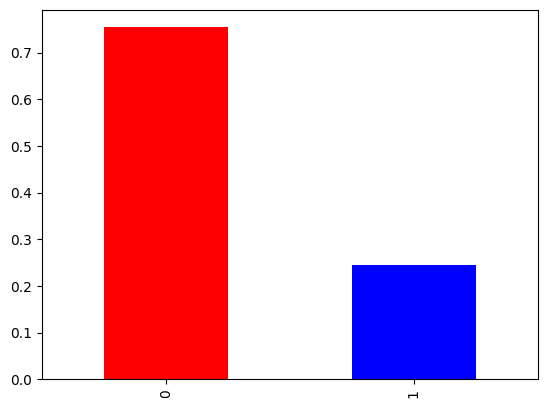

In [166]:
# Masters_Degree check
salary_df.Masters_Degree.value_counts(normalize=True).plot(kind="bar", color=["red", "blue"])
salary_df['Masters_Degree'].value_counts(normalize=True) * 100

0    79.877718
1    20.122282
Name: Bachelors_Degree, dtype: float64

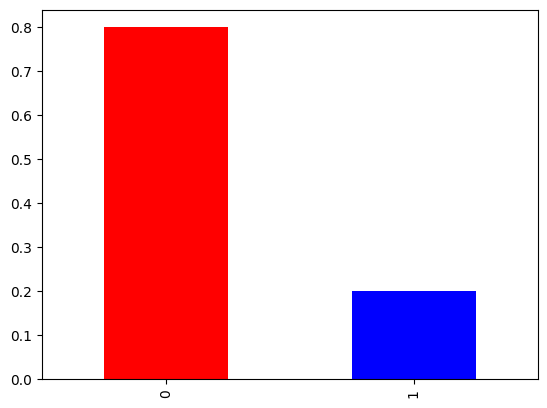

In [167]:
# Bachelors_Degree check
salary_df.Bachelors_Degree.value_counts(normalize=True).plot(kind="bar", color=["red", "blue"])
salary_df['Bachelors_Degree'].value_counts(normalize=True) * 100

0    97.121739
1     2.878261
Name: Doctorate_Degree, dtype: float64

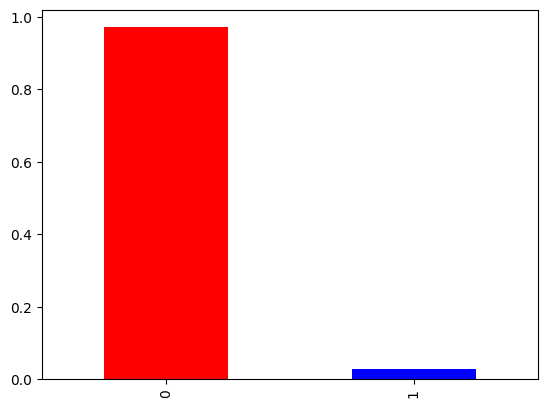

In [169]:
# Doctorate_Degree check
salary_df.Doctorate_Degree.value_counts(normalize=True).plot(kind="bar", color=["red", "blue"])
salary_df['Doctorate_Degree'].value_counts(normalize=True) * 100

0    99.489161
1     0.510839
Name: Highschool, dtype: float64

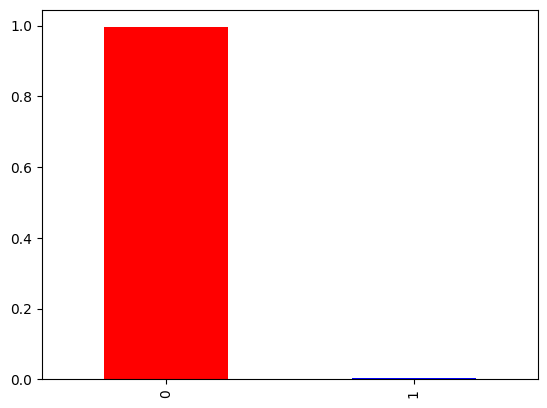

In [170]:
# Highschool check
salary_df.Highschool.value_counts(normalize=True).plot(kind="bar", color=["red", "blue"])
salary_df['Highschool'].value_counts(normalize=True) * 100

0    99.433288
1     0.566712
Name: Some_College, dtype: float64

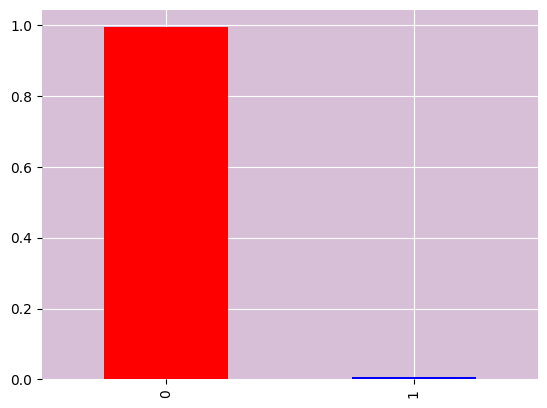

In [181]:
# Some_College check
salary_df.Some_College.value_counts(normalize=True).plot(kind="bar", color=["red", "blue"])
salary_df['Some_College'].value_counts(normalize=True) * 100

Male                               82.831423
Female                             16.238226
Other                               0.928031
Title: Senior Software Engineer      0.00232
Name: gender, dtype: Float64

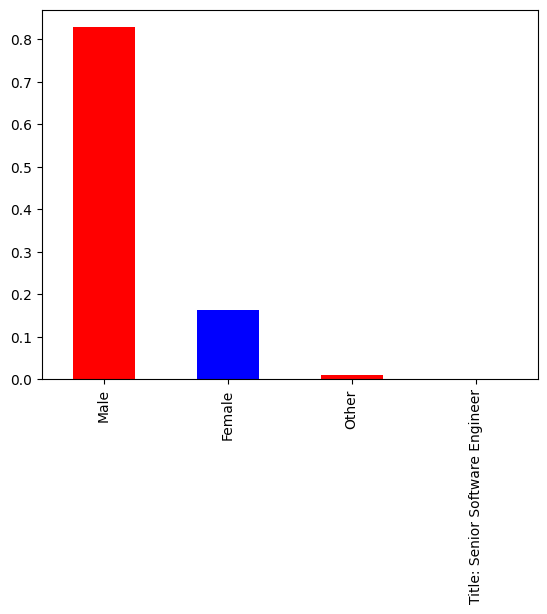

In [172]:
# check gender
salary_df.gender.value_counts(normalize=True).plot(kind="bar", color=["red", "blue"])
salary_df['gender'].value_counts(normalize=True) * 100

In [183]:
salary_df[salary_df.gender=='Title: Senior Software Engineer']

,timestamp,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race,Education
11010,2019-09-17 06:23:02,GitHub,Software Engineer,205000,"Buda, TX",15.0,4.0,Distributed Systems (Back-End),177000.0,31000.0,1000.0,Title: Senior Software Engineer,<NA>,0,0,0,0,0,<NA>,<NA>


In [184]:
salary_df.drop(index=11010, inplace=True)

Master's Degree      50.678301
Bachelor's Degree    41.491604
PhD                   5.607507
Some College          1.168917
Highschool            1.053671
Name: Education, dtype: Float64

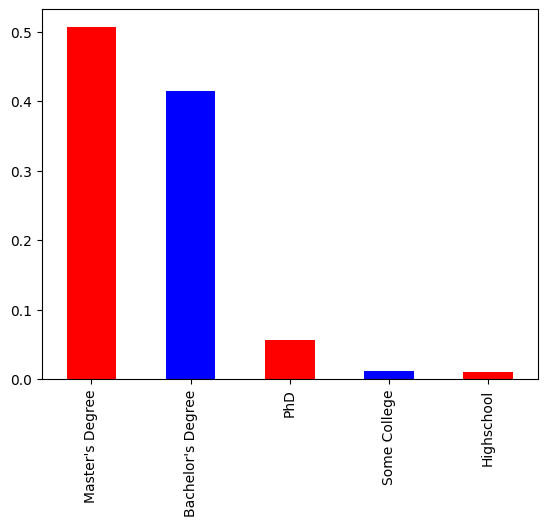

In [176]:
# check education
salary_df.Education.value_counts(normalize=True).plot(kind="bar", color=["red", "blue"])
salary_df['Education'].value_counts(normalize=True) * 100

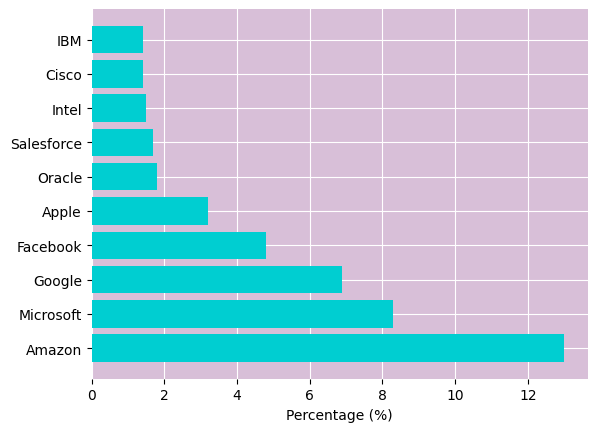

In [180]:
colors = cycler('color', ['#00CED1', '#2F4F4F', '#9988DD', '#F4A460', '#BC8F8F', '#DA70D6']) 
plt.rc('axes', facecolor='#D8BFD8', edgecolor='none', axisbelow=True, grid=True, prop_cycle=colors) 
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='black') 
plt.rc('ytick', direction='out', color='black') 
plt.rc('patch', edgecolor='#D8BFD8') 
plt.rc('lines', linewidth=2)
company = salary_df['company'].value_counts()
top_company = round(company*100/ company.sum(), 1).head(10)
plt.barh(list(top_company.keys()), list(top_company.values))
plt.xlabel('Percentage (%)');


---

# Questioning

---

## Questions:

1. 

2. 

3. 





## Answer: